# Comparison between the types for the ages (after controlling for gender)

Questions

- What are the differences between the types for the ages?
- Do we observe the same changes as globally?

# Loads

## Libraries and functions

In [ ]:
source("install_libraries.R")

In [2]:
source("load_libraries.R")

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.


preparing gene to GO mapping data...
preparing IC data...
preparing gene to GO mapping data...
preparing IC data...
preparing gene to GO mapping data...
preparing IC data...


In [3]:
source("functions.R")

## Data

In [4]:
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [5]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_layout.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [6]:
module_nb = length(unique(connected_gene_colors))
pal2 = c(pal2, "white", "black")

In [7]:
# Interactions between genders and ages (after controlling type)
GF_SPF_8w = results(dge,contrast= c(0,0,1,0,0,0,0,1/2,0,0), alpha=0.05, test="Wald")
GF_SPF_52w = results(dge,contrast= c(0,0,1,0,0,0,0,1/2,0,1), alpha=0.05, test="Wald")
GF_SPF_104w = results(dge,contrast= c(0,0,1,0,0,0,0,1/2,1,0), alpha=0.05, test="Wald")
GF_SPF = results(dge,contrast= c(0,0,1,0,0,0,0,1/2,1/3,1/3), alpha=0.05, test="Wald")

In [8]:
w8_samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2',
    'GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2')
w52_samples = c(    
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2',
    'GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2')
w104_samples = c(      
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2',
    'GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2','GF_104w_M_1_2','GF_104w_M_2_2')
annot = as.data.frame(colData(dge)[, c("type","gender")])

# Stats

In [9]:
# Stats
type_age_stats = matrix(0, nrow=3, ncol=3)
rownames(type_age_stats) = c("GF VS SPF (8w)", "GF VS SPF (52w)", "GF VS SPF (104w)")
colnames(type_age_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
type_age_stats[1,] = get_stats_padj(GF_SPF_8w)
type_age_stats[2,] = get_stats_padj(GF_SPF_52w)
type_age_stats[3,] = get_stats_padj(GF_SPF_104w)
type_age_stats

,Wald padj < 0.05,LFC > 0 (Wald padj < 0.05),LFC < 0 (Wald padj < 0.05)
GF VS SPF (8w),337,180,157
GF VS SPF (52w),779,310,469
GF VS SPF (104w),2622,1122,1500


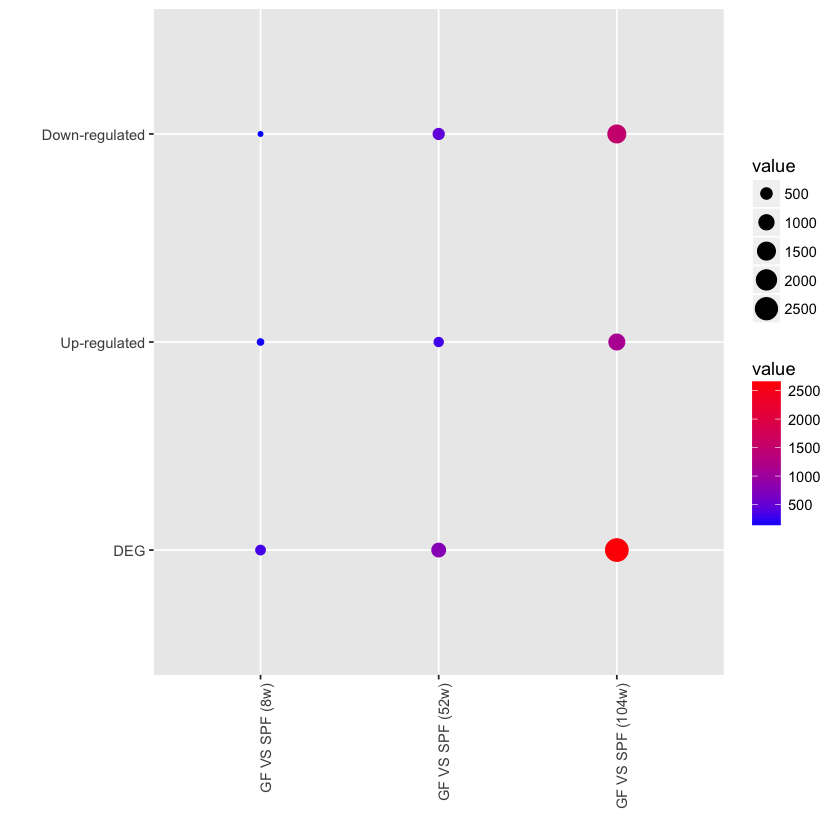

In [10]:
plot_stat_mat(type_age_stats)

# Differentially expressed genes

In [11]:
type_age_data = list(GF_SPF_8w, GF_SPF_52w, GF_SPF_104w, GF_SPF)
names(type_age_data) = c("GF VS SPF (8w)", "GF VS SPF (52w)", "GF VS SPF (104w)", "GF VS SPF (global)")
type_age_deg = extract_diff_expr_genes(type_age_data, "type-effect/type_age/")

Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”

# Counts

GF != SPF for 8w with abs(FC) > 2

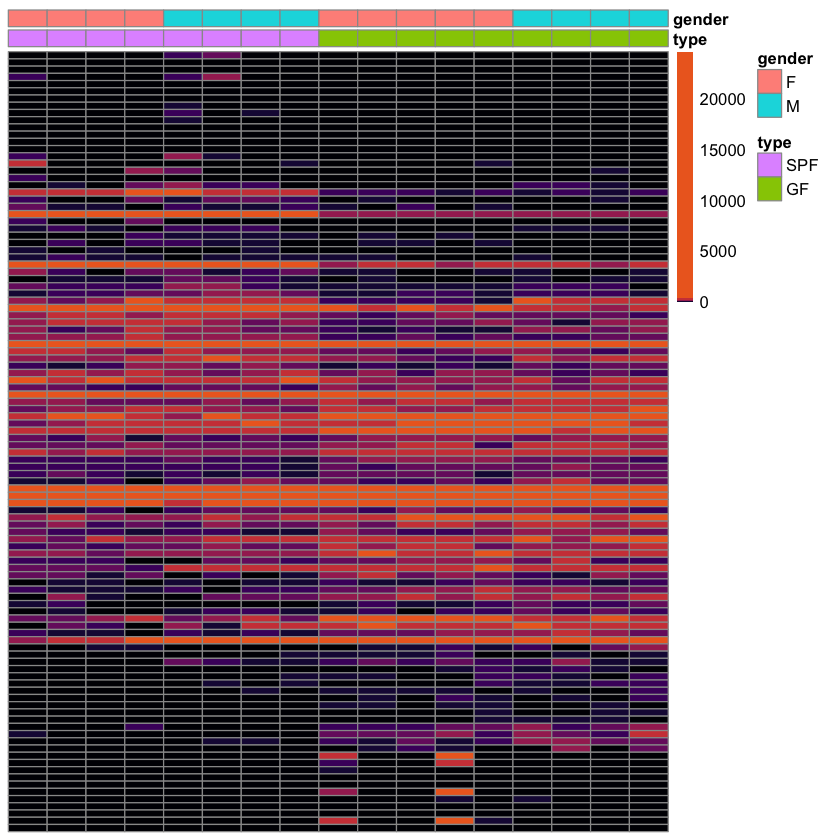

In [12]:
# GF != SPF for 8w with abs(FC) > 2
genes = names((sort(type_age_deg$fc_deg[which(abs(type_age_deg$fc_deg[,1])>1),1])))
plot_count_heatmap(genes,w8_samples, annot)

GF != SPF for 52w with abs(FC) > 2

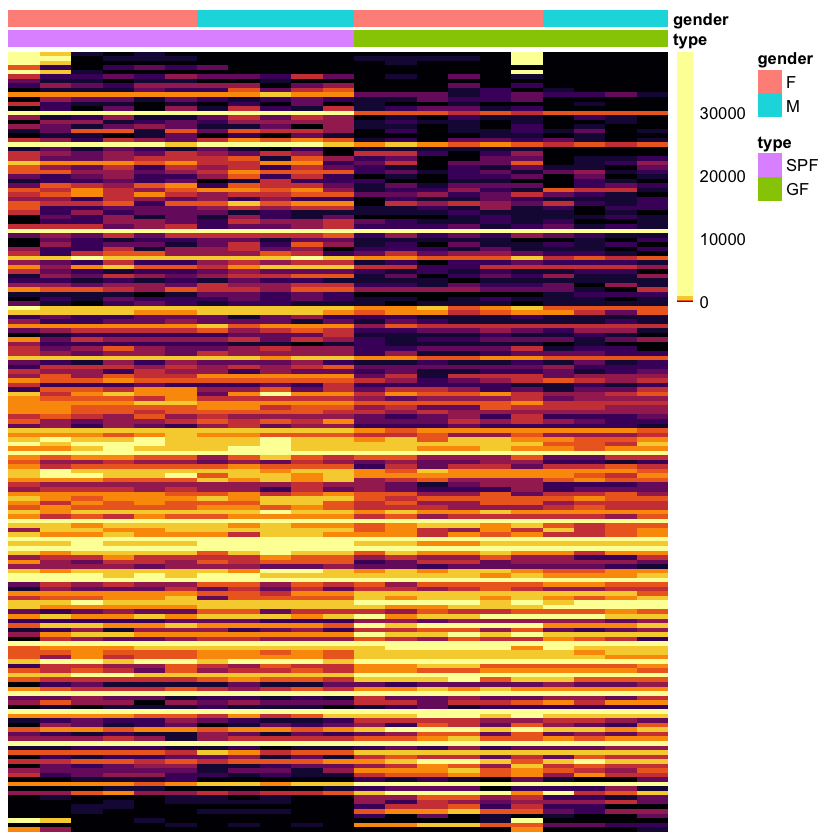

In [13]:
# GF != SPF for 52w with abs(FC) > 2
genes = names((sort(type_age_deg$fc_deg[which(abs(type_age_deg$fc_deg[,2])>1),2])))
plot_count_heatmap(genes,w52_samples, annot)

GF != SPF for 104w with abs(FC) > 2

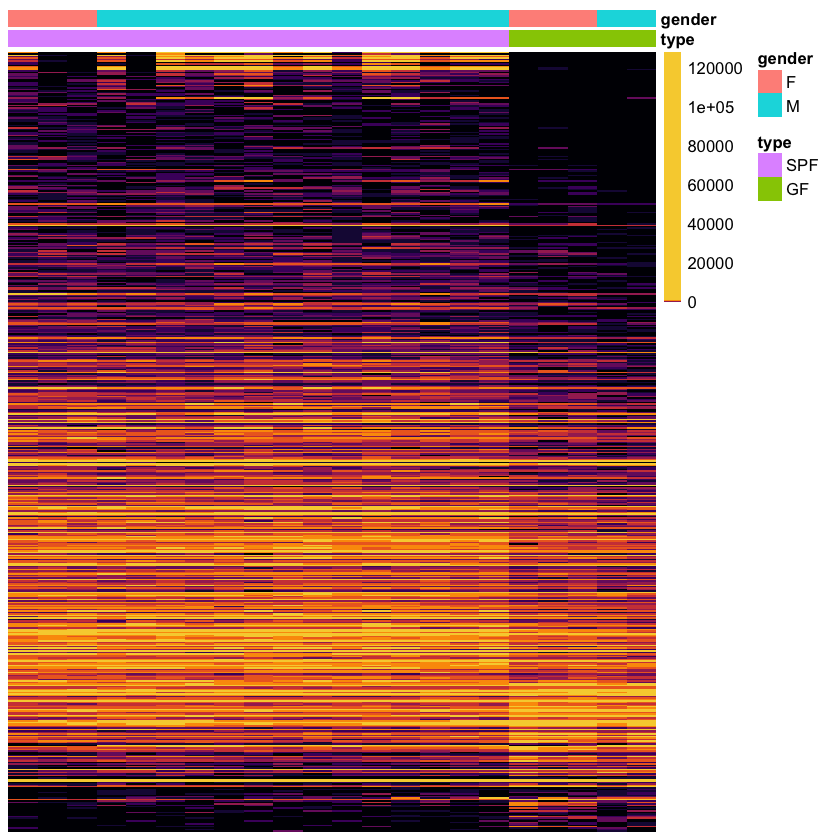

In [14]:
# GF != SPF for 104w with abs(FC) > 2
genes = names((sort(type_age_deg$fc_deg[which(abs(type_age_deg$fc_deg[,3])>1),3])))
plot_count_heatmap(genes,w104_samples, annot)

# Comparison of the numbers per ages

Differentially expressed genes

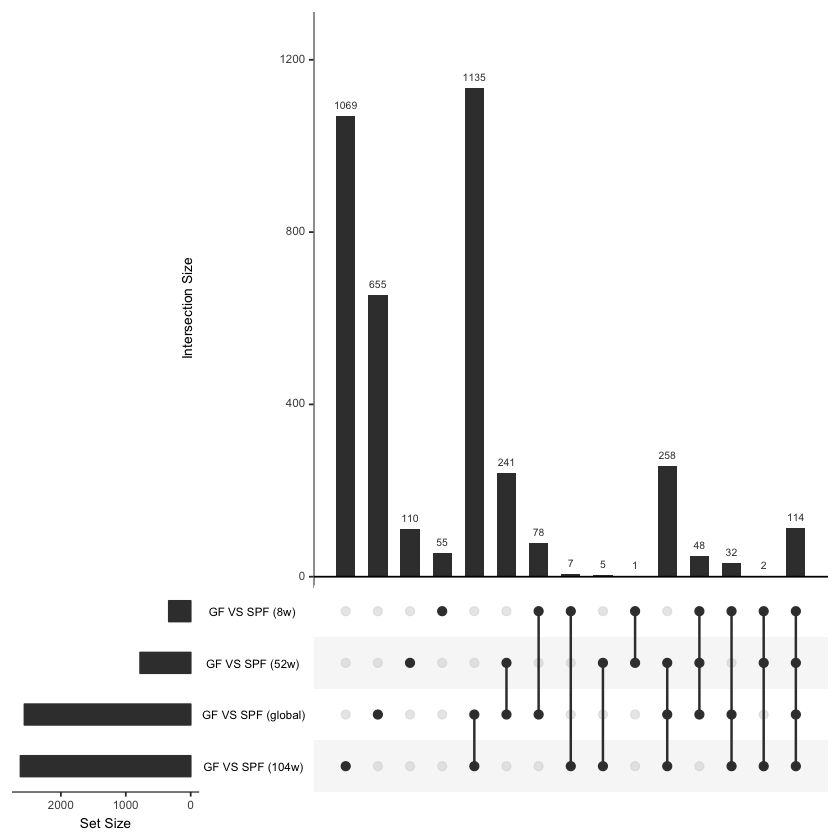

In [15]:
# Differentially expressed genes
upset(as.data.frame(type_age_deg$deg))

# DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated

GF vs SPF: 8w, 52w, 104w


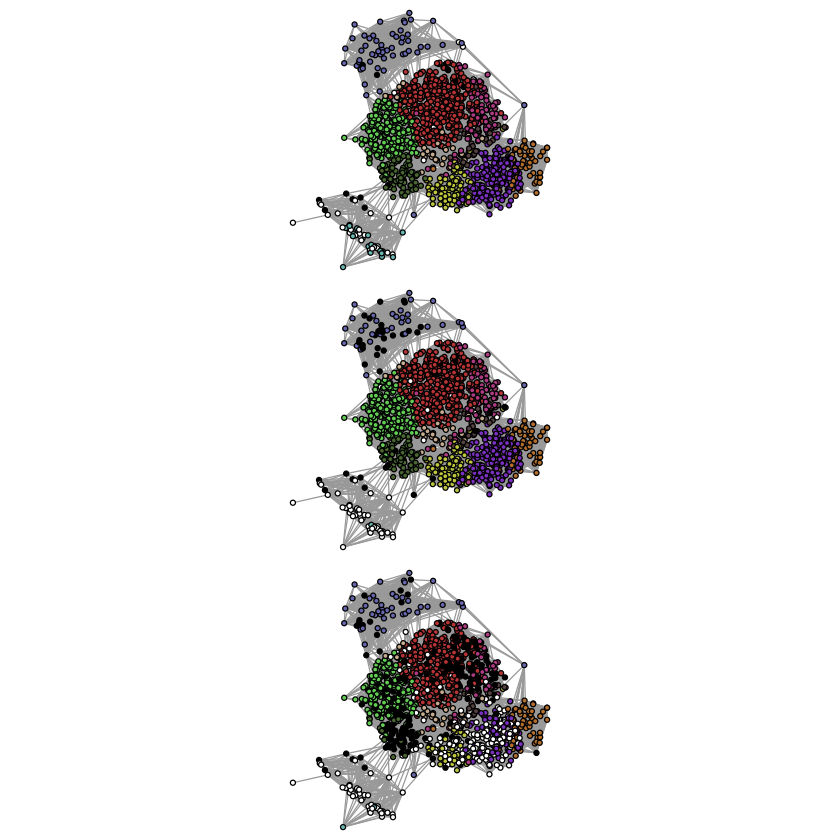

In [16]:
par(mfrow=c(3,1),mar=c(0,0,0,0))
col_GF_vs_SPF_8w = get_deg_colors(type_age_deg, "GF VS SPF (8w)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_GF_vs_SPF_8w, pal2, layout, add_legend = FALSE)
col_GF_vs_SPF_52w = get_deg_colors(type_age_deg, "GF VS SPF (52w)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_GF_vs_SPF_52w, pal2, layout, add_legend = FALSE)
col_GF_vs_SPF_104w = get_deg_colors(type_age_deg, "GF VS SPF (104w)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_GF_vs_SPF_104w, pal2, layout, add_legend = FALSE)

# GO analysis

In [17]:
full_go_desc = type_age_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = type_age_deg$GO_wall[[1]][,"category"]
comp = colnames(type_age_deg$over_represented_GO)
comp = comp[4:length(comp)]

## Biological process

Dot-plot with the most over-represented BP GO (20 most significant p-values for the different comparison)

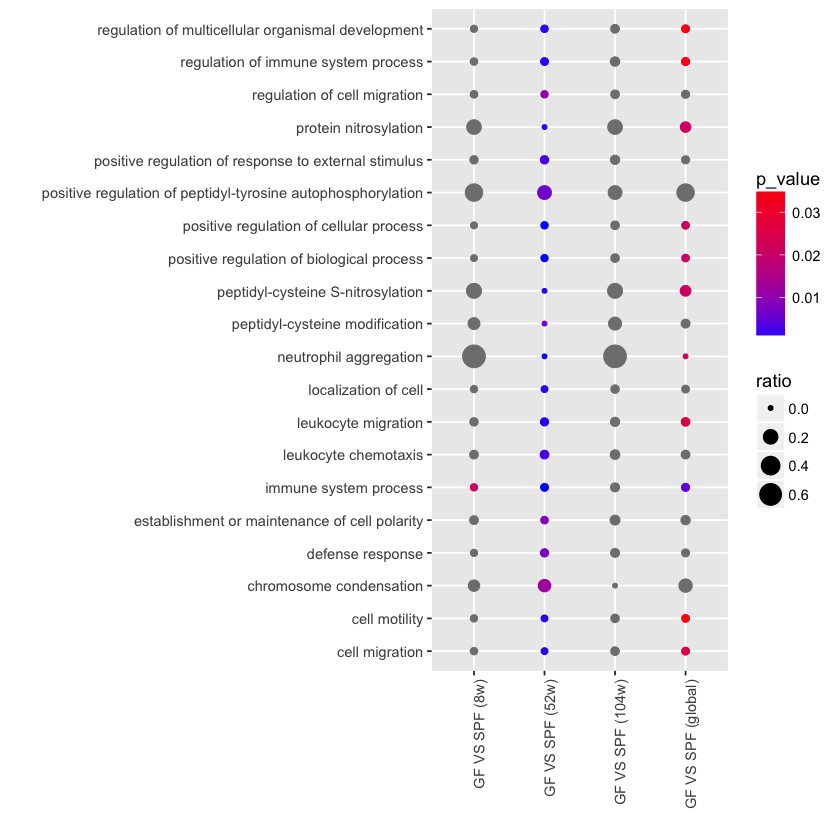

In [18]:
plot_top_go(type_age_deg$over_represented_GO,
            type_age_deg$GO_wall,
            "BP",
            comp,
            20)

Network based on description similarity

In [19]:
BP_network = create_GO_network(type_age_deg, "BP", BP_GO)

GF vs SPF: 8w, 52w, 104w

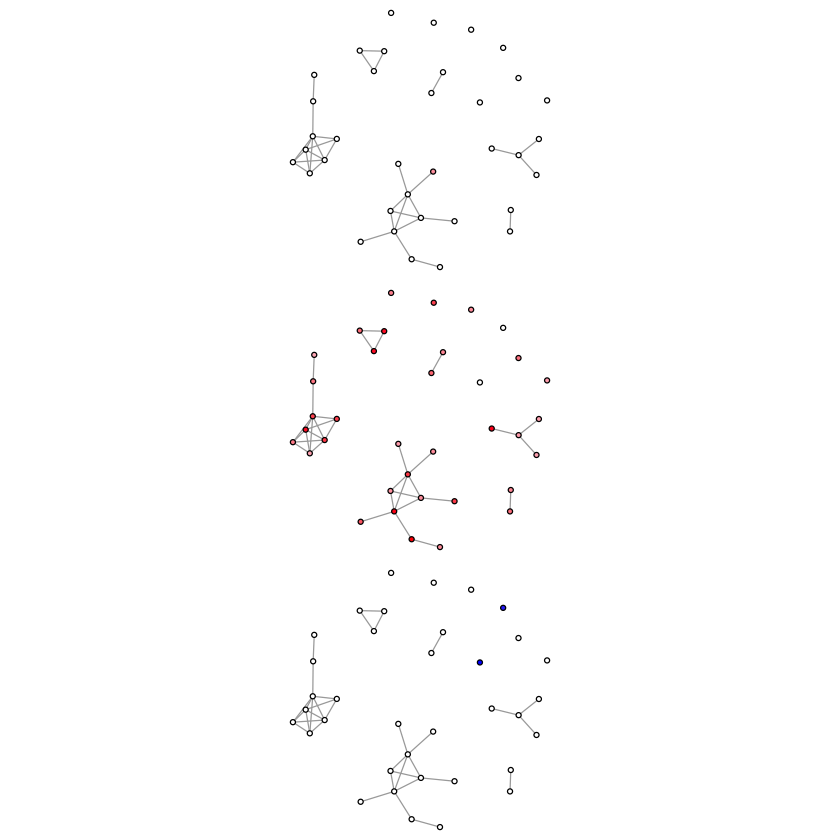

In [20]:
par(mfrow=c(3,1),mar=c(0,0,0,0))
plot_GO_networks(BP_network, "GF VS SPF (8w)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "GF VS SPF (52w)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "GF VS SPF (104w)", full_go_desc, plot_interactive = FALSE)

GF VS SPF (8w)

In [21]:
# GF VS SPF (8w)
plot_GO_networks(BP_network, "GF VS SPF (8w)", full_go_desc, plot_non_interactive = F)

HTML widgets cannot be represented in plain text (need html)

GF VS SPF (104w)

In [22]:
# GF VS SPF (104w)
plot_GO_networks(BP_network, "GF VS SPF (52w)", full_go_desc, plot_non_interactive = F)

HTML widgets cannot be represented in plain text (need html)

GF VS SPF (104w)

In [23]:
# GF VS SPF (104w)
plot_GO_networks(BP_network, "GF VS SPF (104w)", full_go_desc, plot_non_interactive = F)

HTML widgets cannot be represented in plain text (need html)

## Cellular components

Dot-plot with the most over-represented CC GO (20 most significant p-values for the different comparison)

Warning message:
“Removed 4 rows containing missing values (geom_point).”

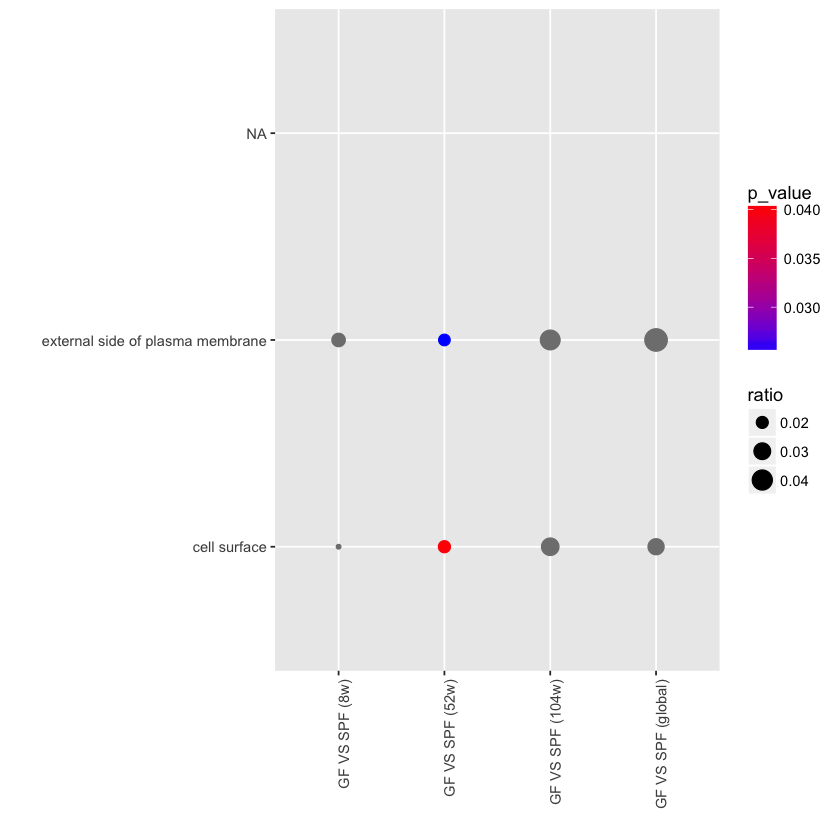

In [24]:
plot_top_go(type_age_deg$over_represented_GO,
            type_age_deg$GO_wall,
            "CC",
            comp,
            20)

## Molecular functions

Dot-plot with the most over-represented MF GO (20 most significant p-values for the different comparison)

Warning message:
“Removed 4 rows containing missing values (geom_point).”

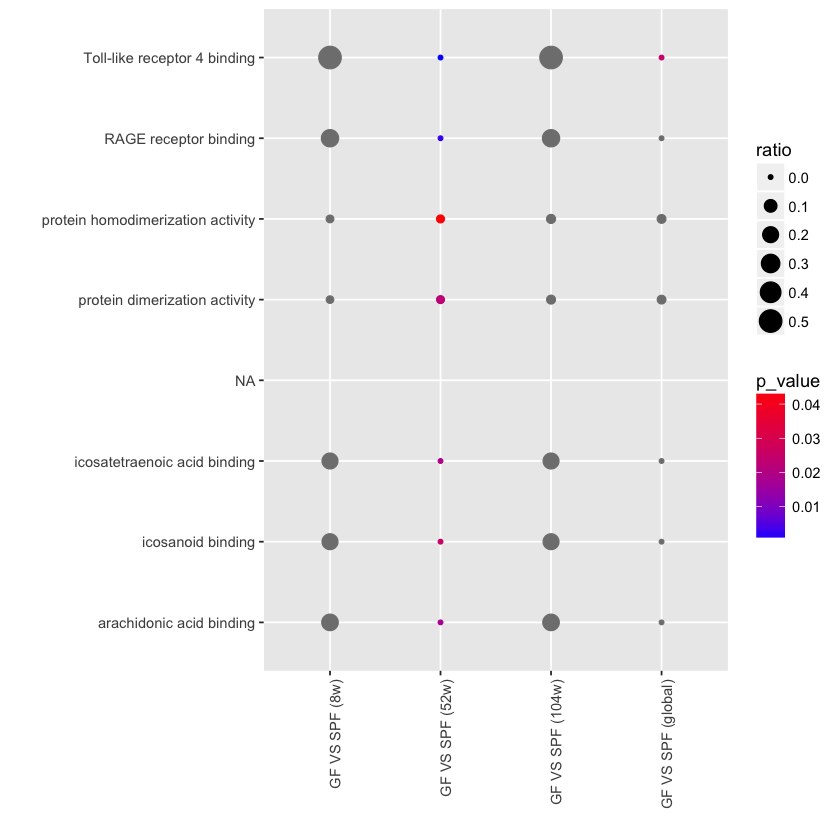

In [25]:
plot_top_go(type_age_deg$over_represented_GO,
            type_age_deg$GO_wall,
            "MF",
            comp,
            20)

# KEGG pathways

In [26]:
plot_kegg_pathways(type_age_deg$over_represented_KEGG[,"category"],
                   type_age_deg$fc_deg,
                   "../results/dge/type-effect/type_age/over_repr_kegg/")

[1] "Note: 9 of 3810 unique input IDs unmapped."
[1] "Note: 9 of 3810 unique input IDs unmapped."
[1] "Note: 9 of 3810 unique input IDs unmapped."
[1] "Note: 9 of 3810 unique input IDs unmapped."


Pathway graphs available at ../results/dge/type-effect/type_age/over_repr_kegg/

In [27]:
plot_kegg_pathways(type_age_deg$under_represented_KEGG[,"category"],
                   type_age_deg$fc_deg,
                   "../results/dge/type-effect/type_age/under_repr_kegg/")

[1] "Note: 9 of 3810 unique input IDs unmapped."


Warning message in file.rename(from = paste("mmu", cat, ".pathview.multi.png", sep = ""), :
“cannot rename file 'mmu00511.pathview.multi.png' to '../results/dge/type-effect/type_age/under_repr_kegg/mmu00511.pathview.multi.png', reason 'No such file or directory'”

Pathway graphs available at ../results/dge/type-effect/type_age/under_repr_kegg/